In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

In [136]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [137]:
df.dropna(inplace=True)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [139]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [140]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

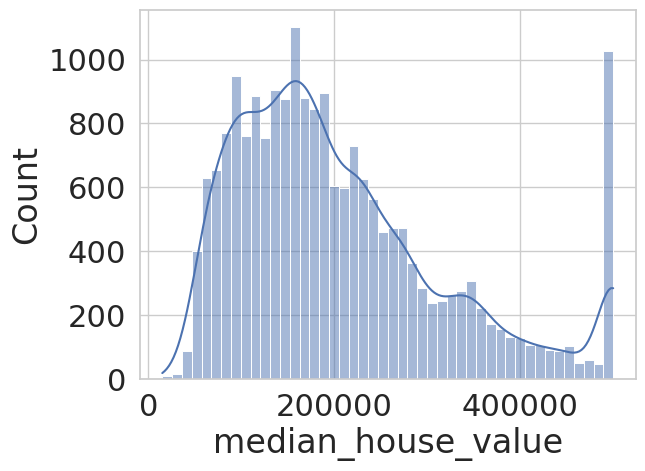

In [141]:
sns.histplot(df["median_house_value"], kde=True)

<AxesSubplot:>

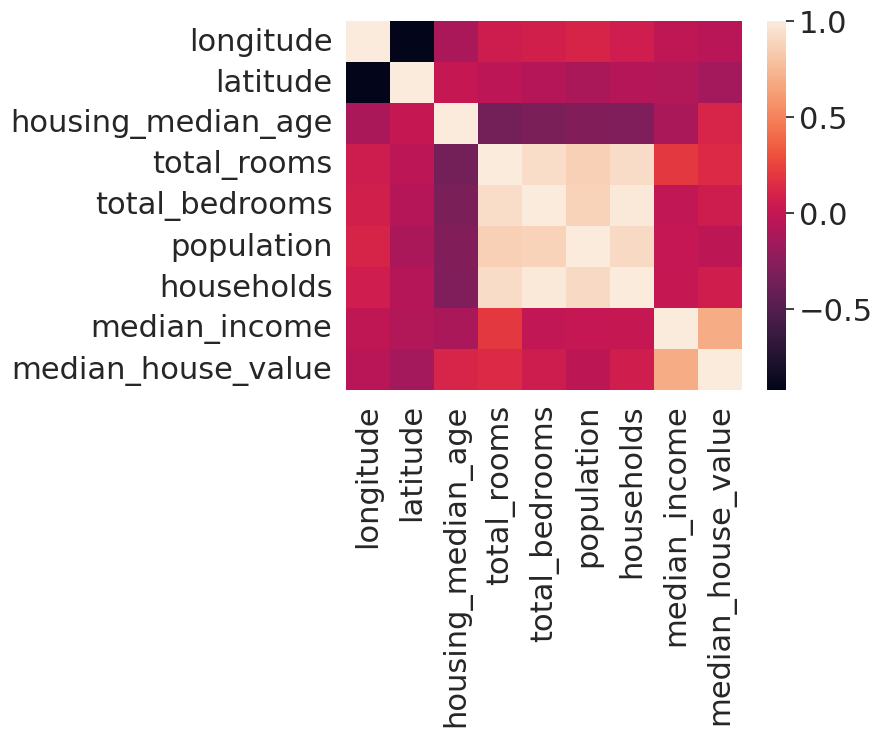

In [142]:
corr_date = df.corr()
sns.heatmap(corr_date)

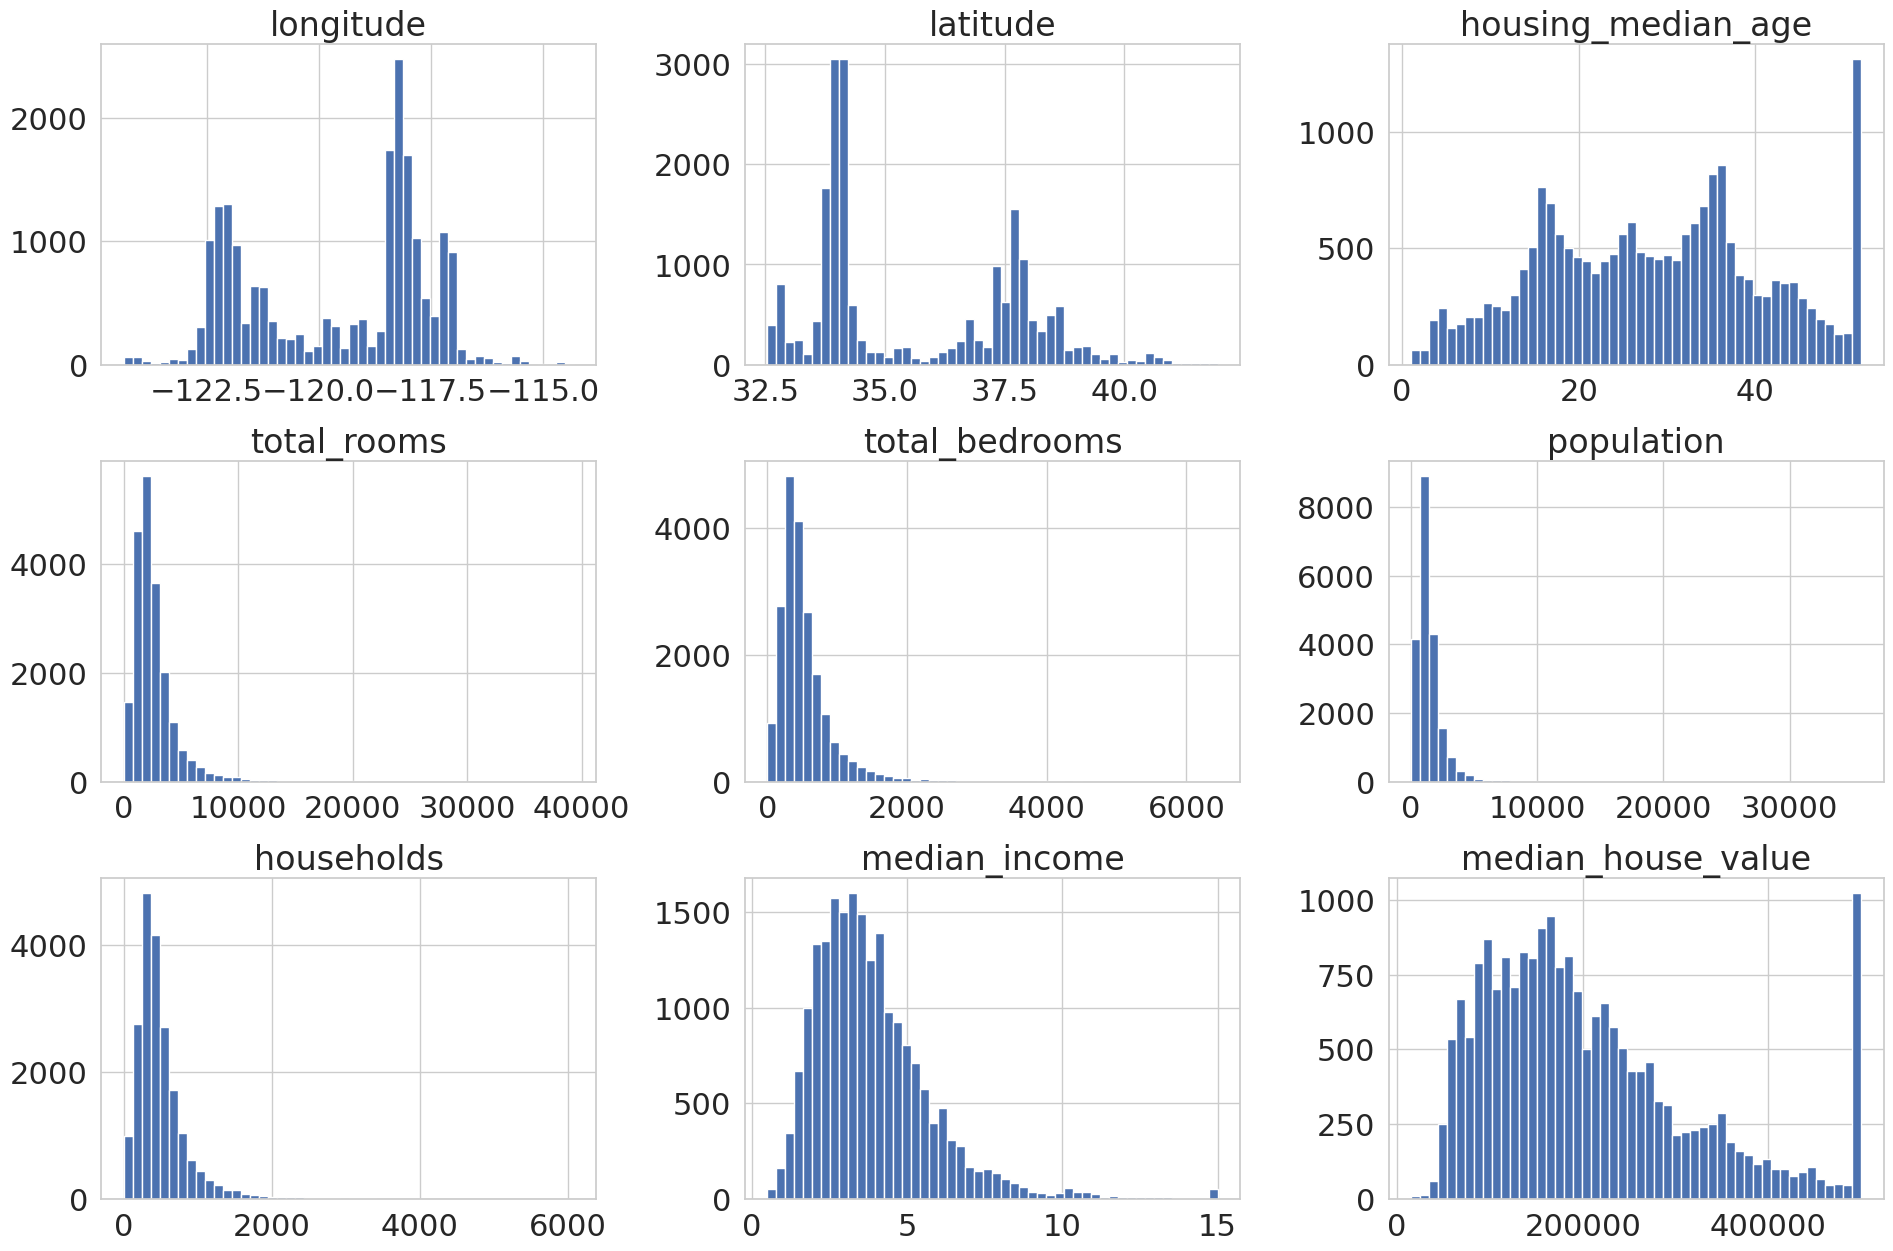

In [162]:
df.hist(bins=50, figsize=(23,15))
plt.show()

In [144]:
sample_df = df.sample(frac=0.1, random_state=17)
print(sample_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6978     -118.03     33.97                32.0       2468.0           552.0   
13051    -121.29     38.61                17.0      13553.0          2474.0   
4948     -118.30     34.02                42.0       2386.0           670.0   
15082    -116.94     32.80                28.0       3042.0           729.0   
8364     -118.35     33.97                25.0       1864.0           616.0   
...          ...       ...                 ...          ...             ...   
6887     -118.10     34.06                36.0       1463.0           369.0   
5500     -118.42     33.99                35.0       1701.0           482.0   
9880     -121.79     36.64                11.0      32627.0          6445.0   
10143    -117.90     33.90                19.0       2176.0           414.0   
18058    -122.01     37.27                27.0       3340.0           451.0   

       population  households  median_income  media

In [145]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

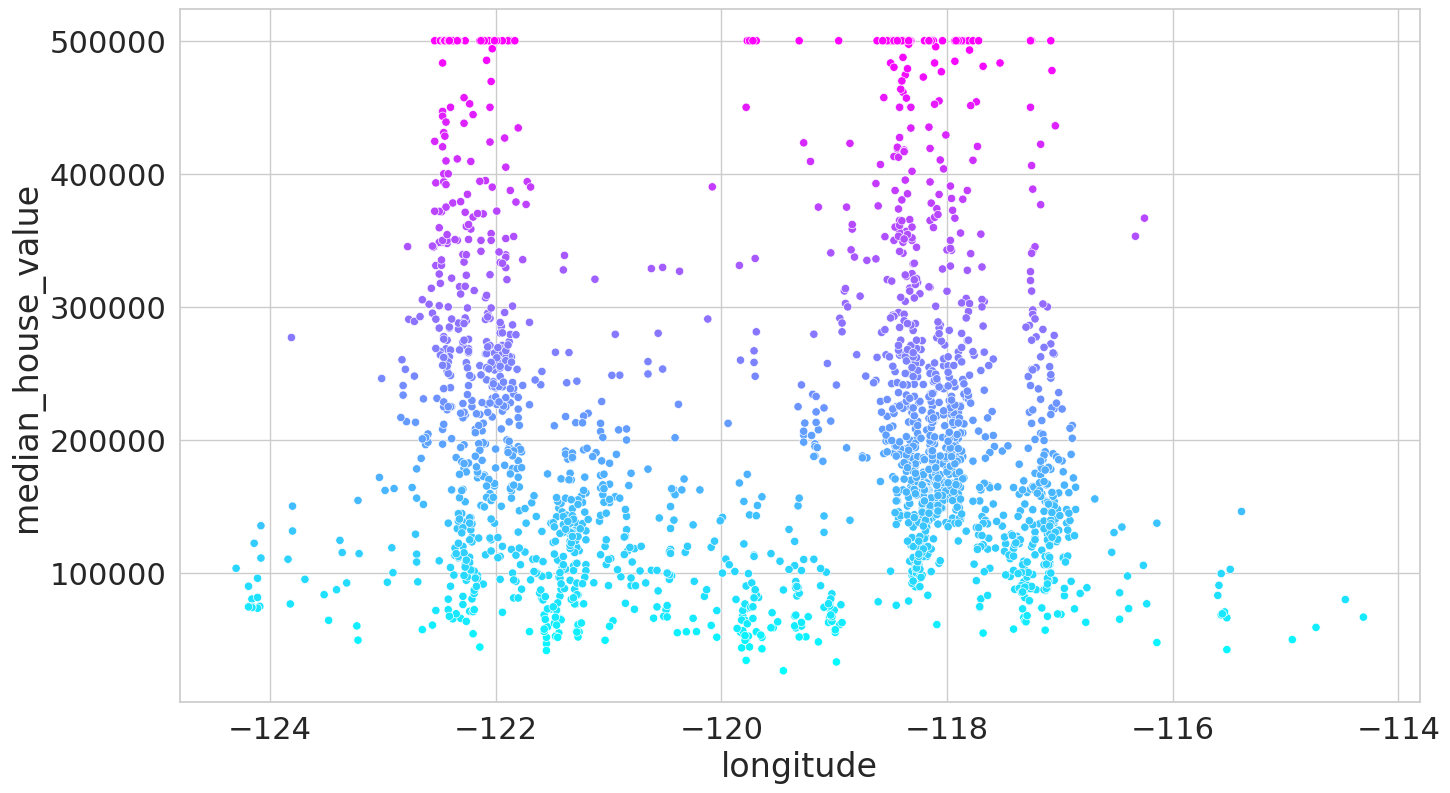

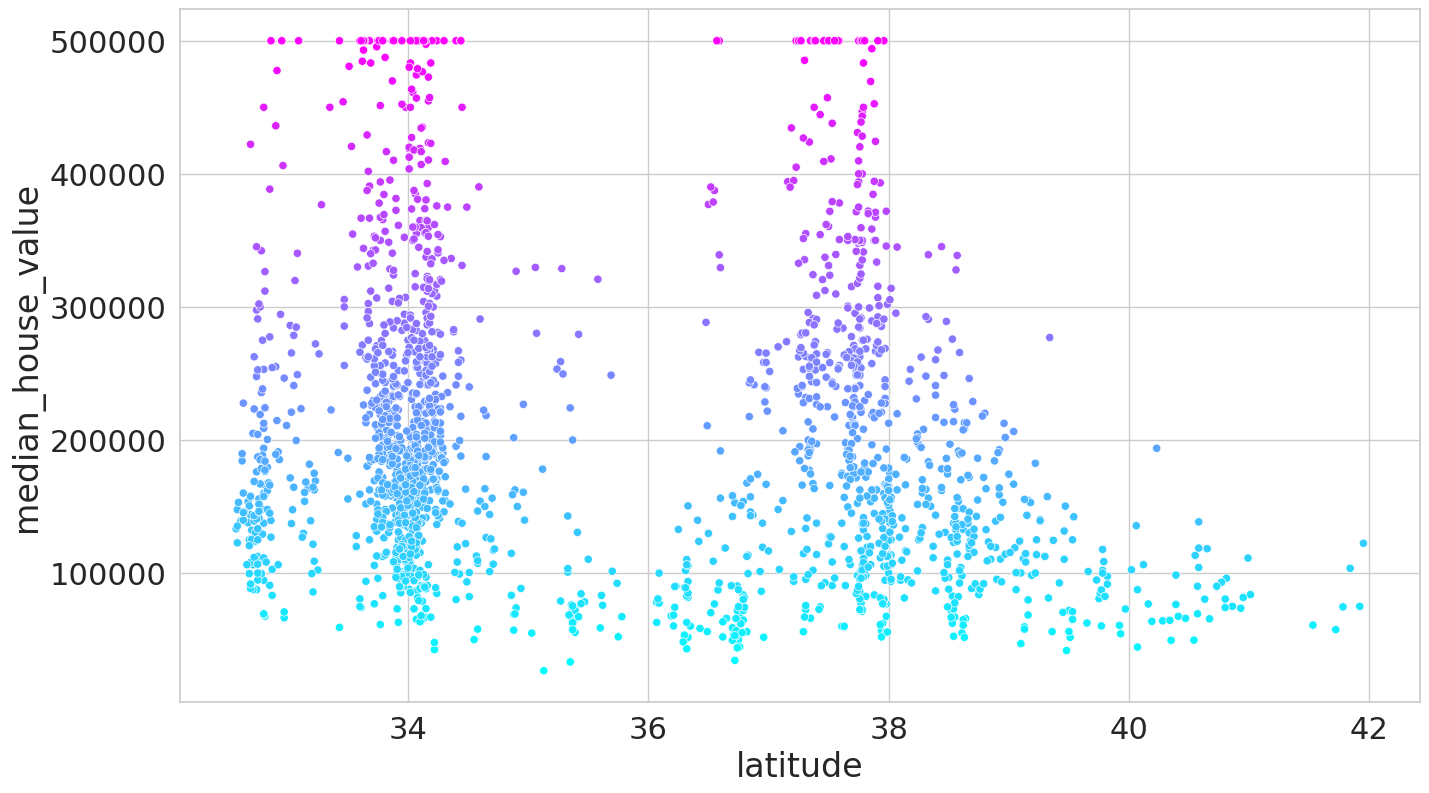

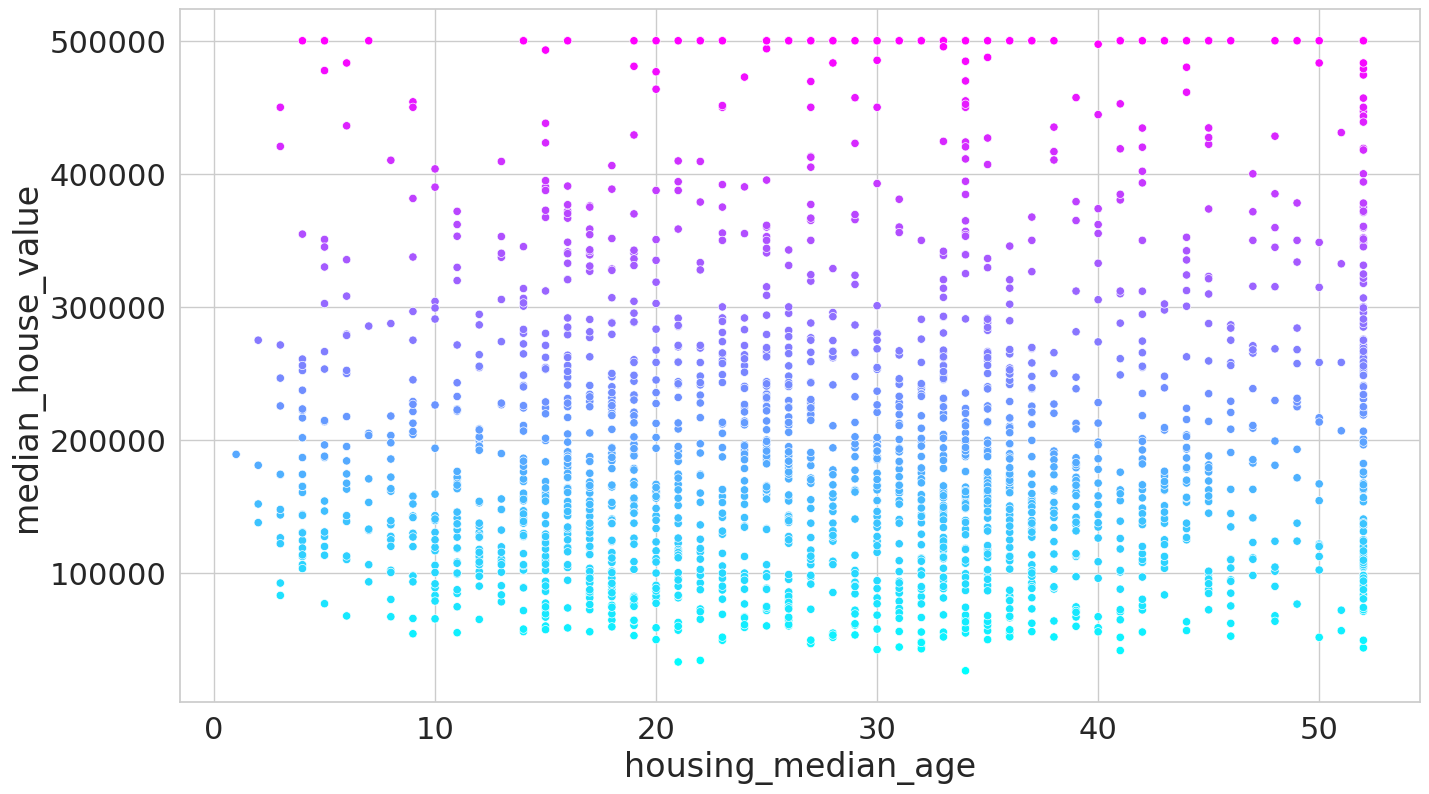

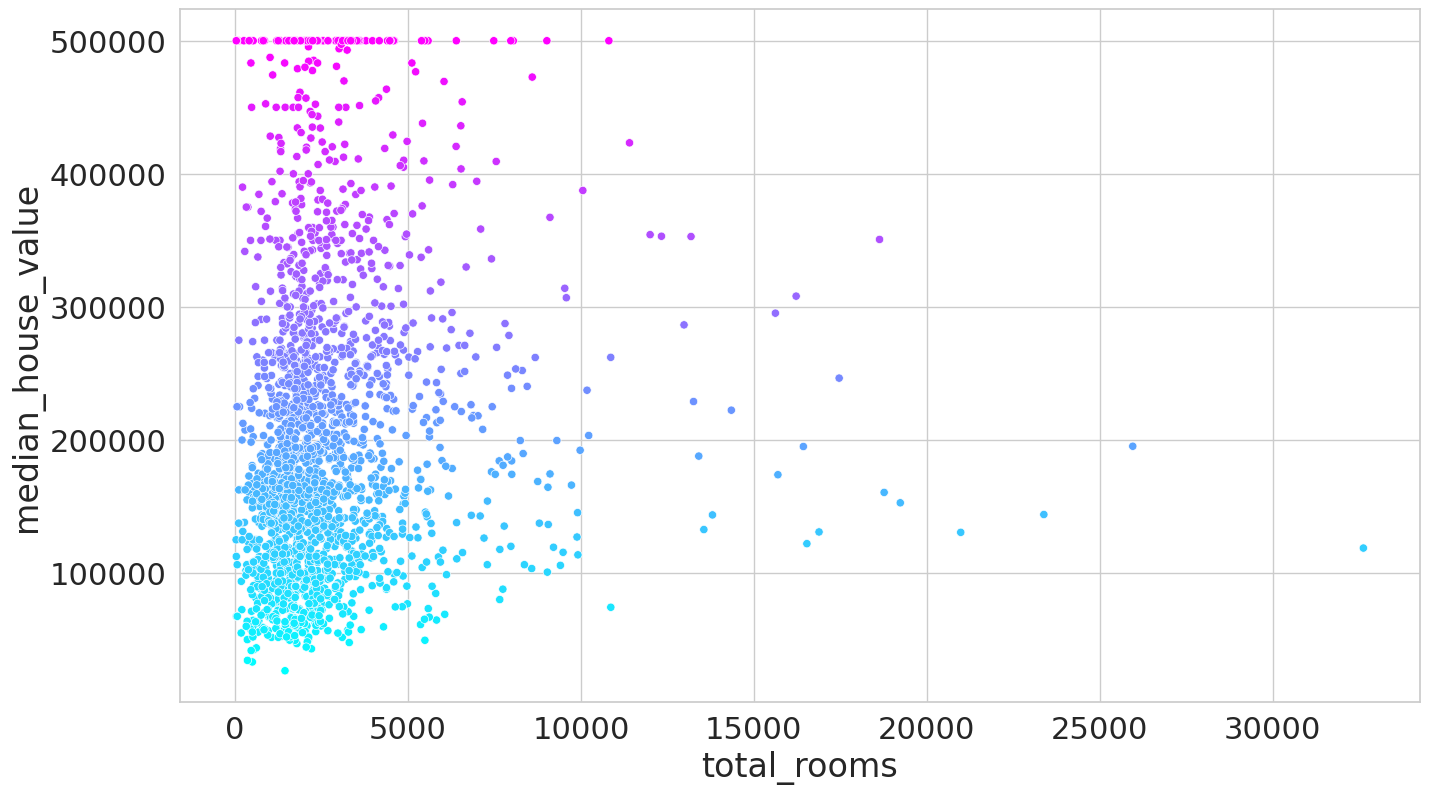

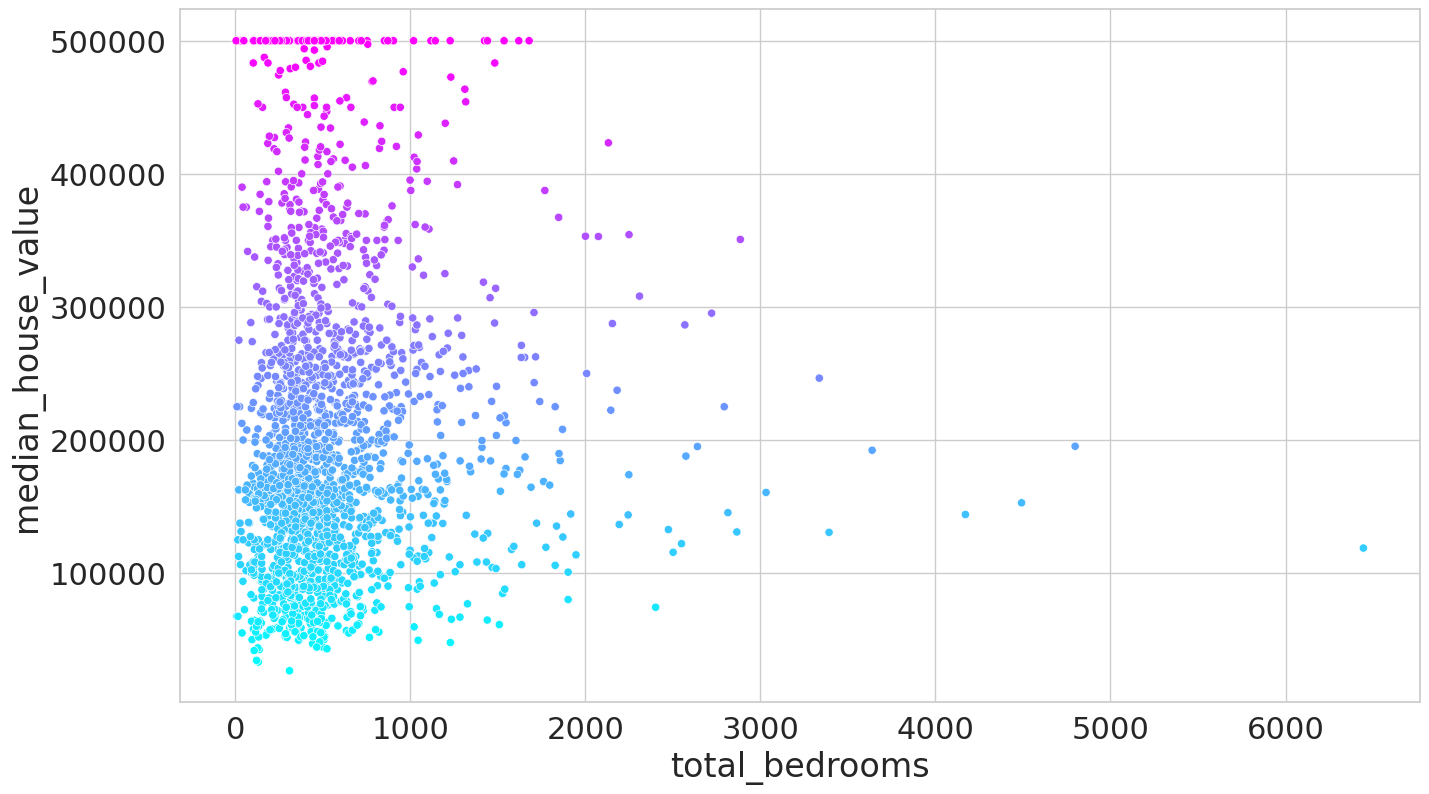

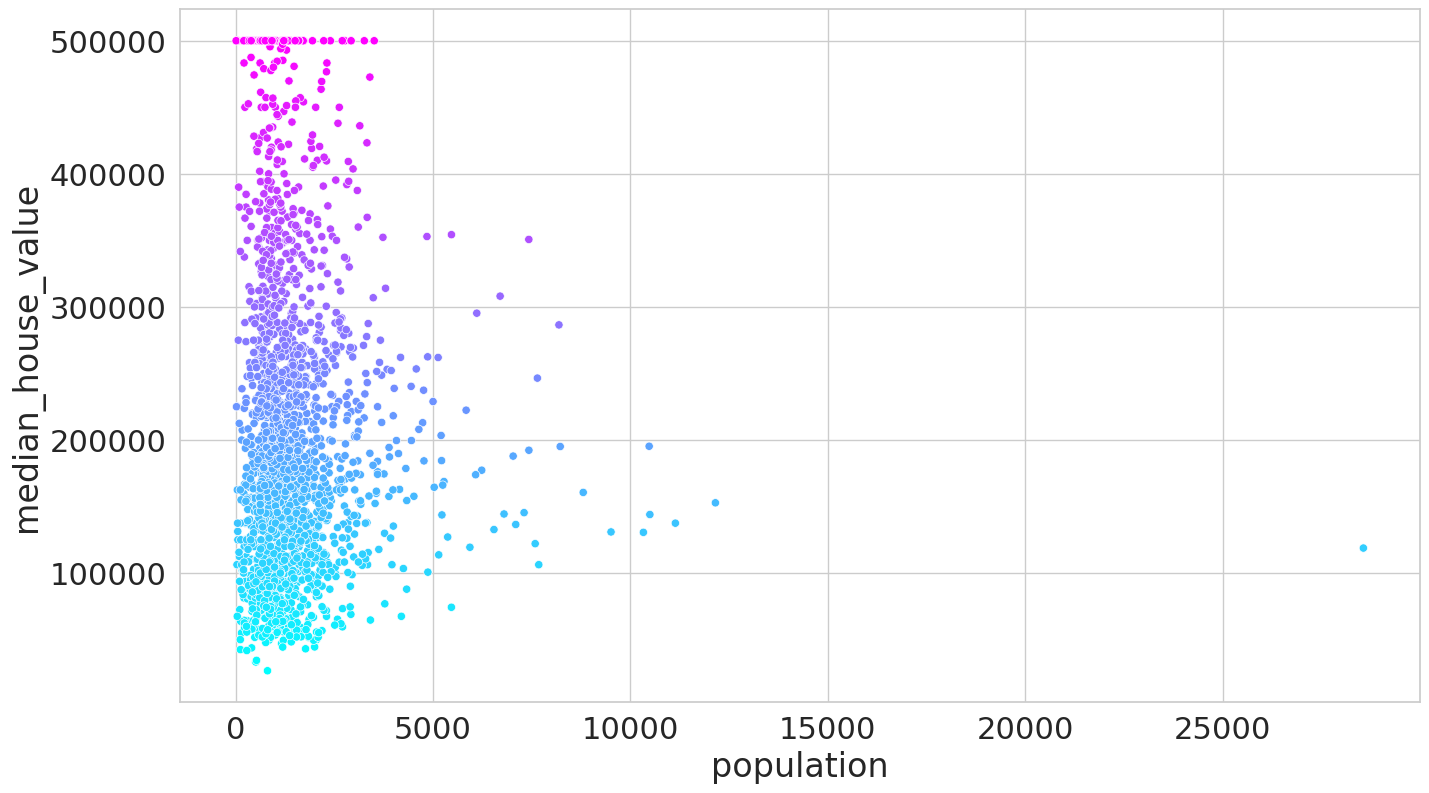

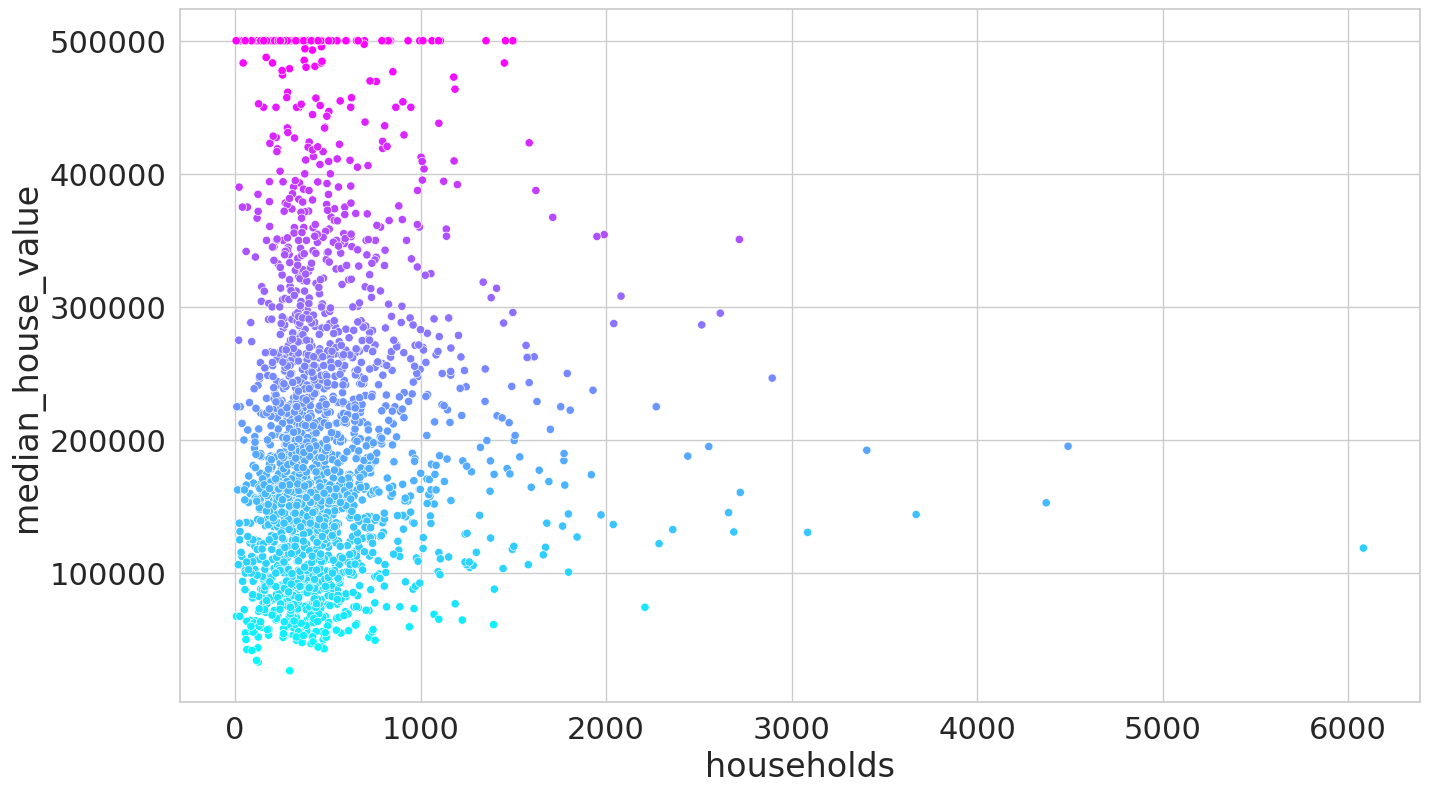

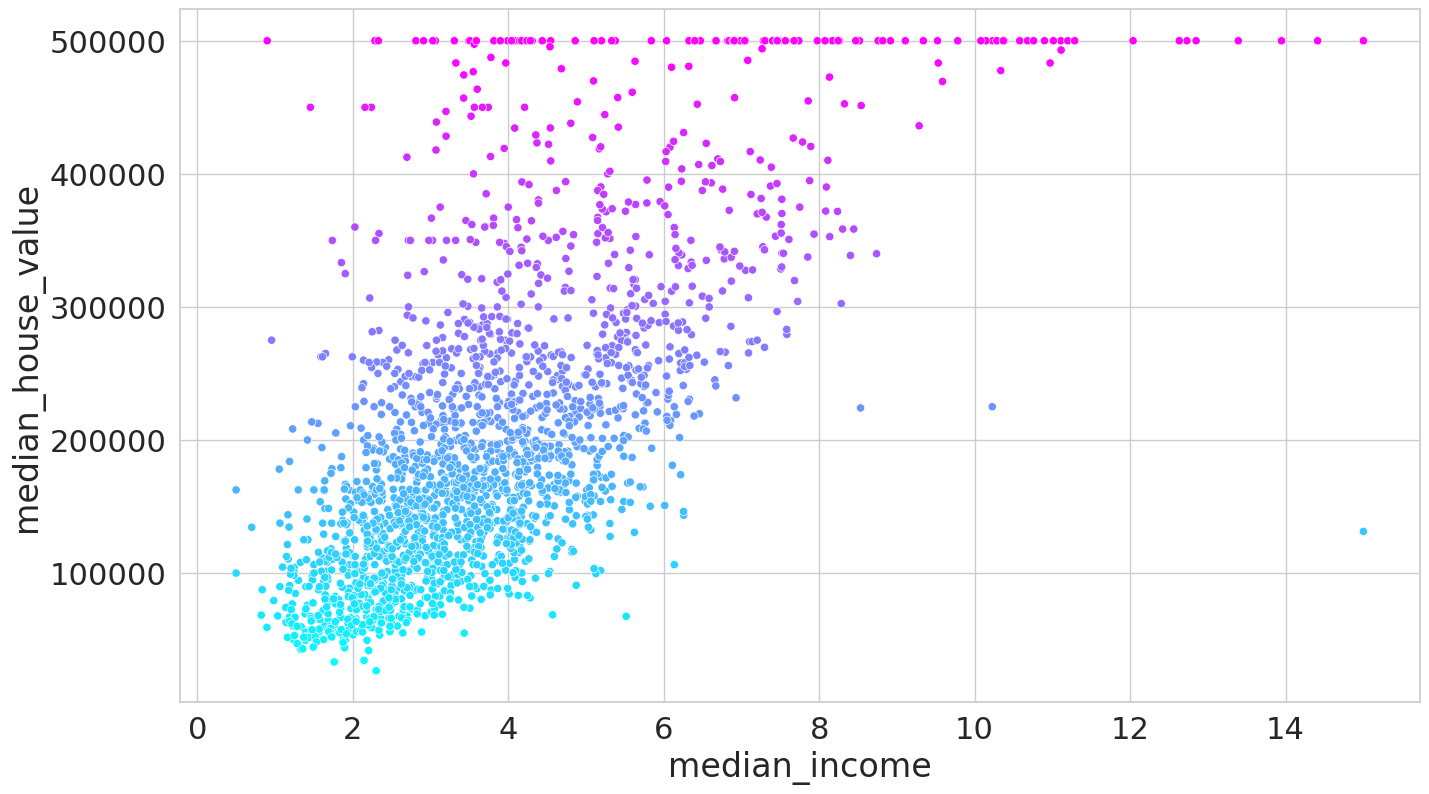

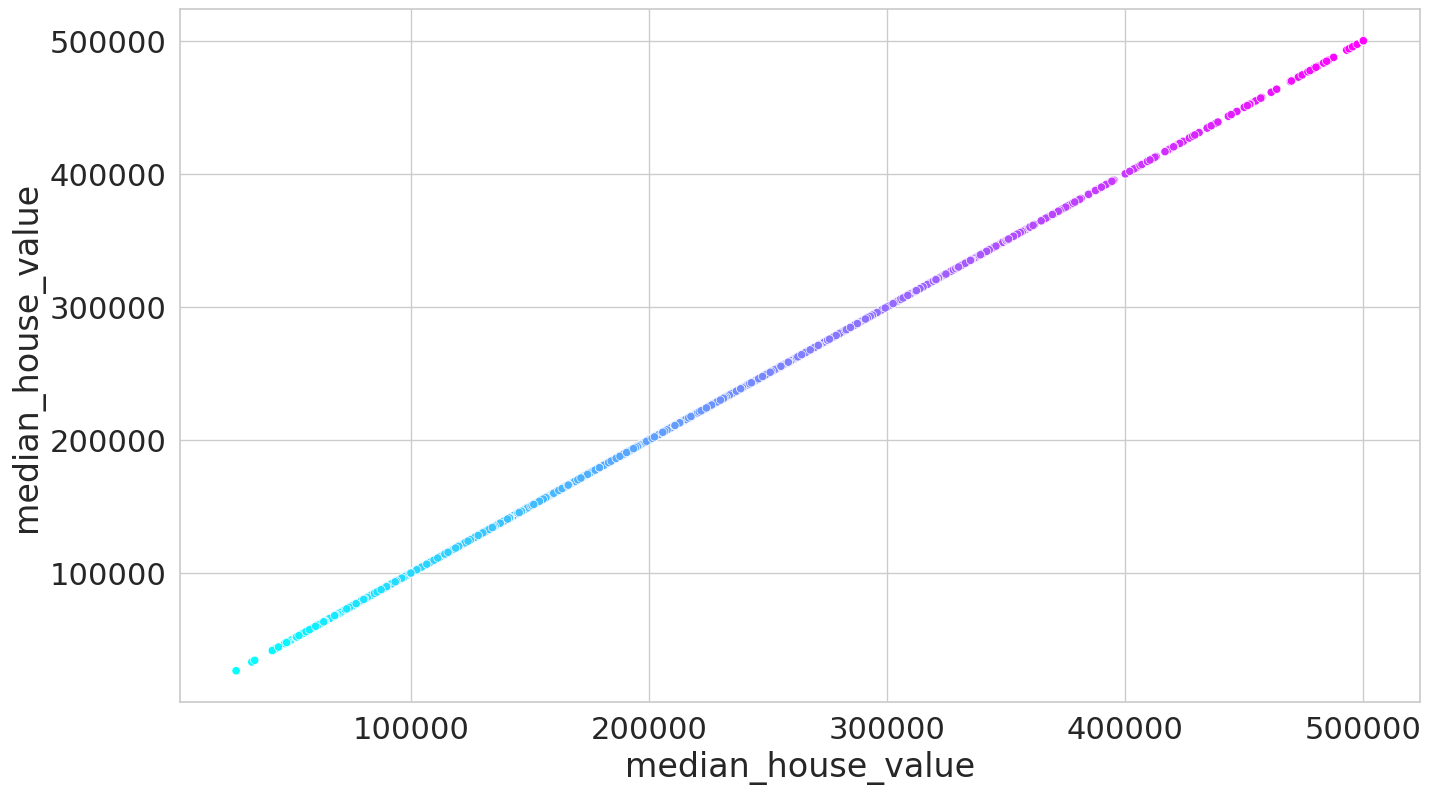

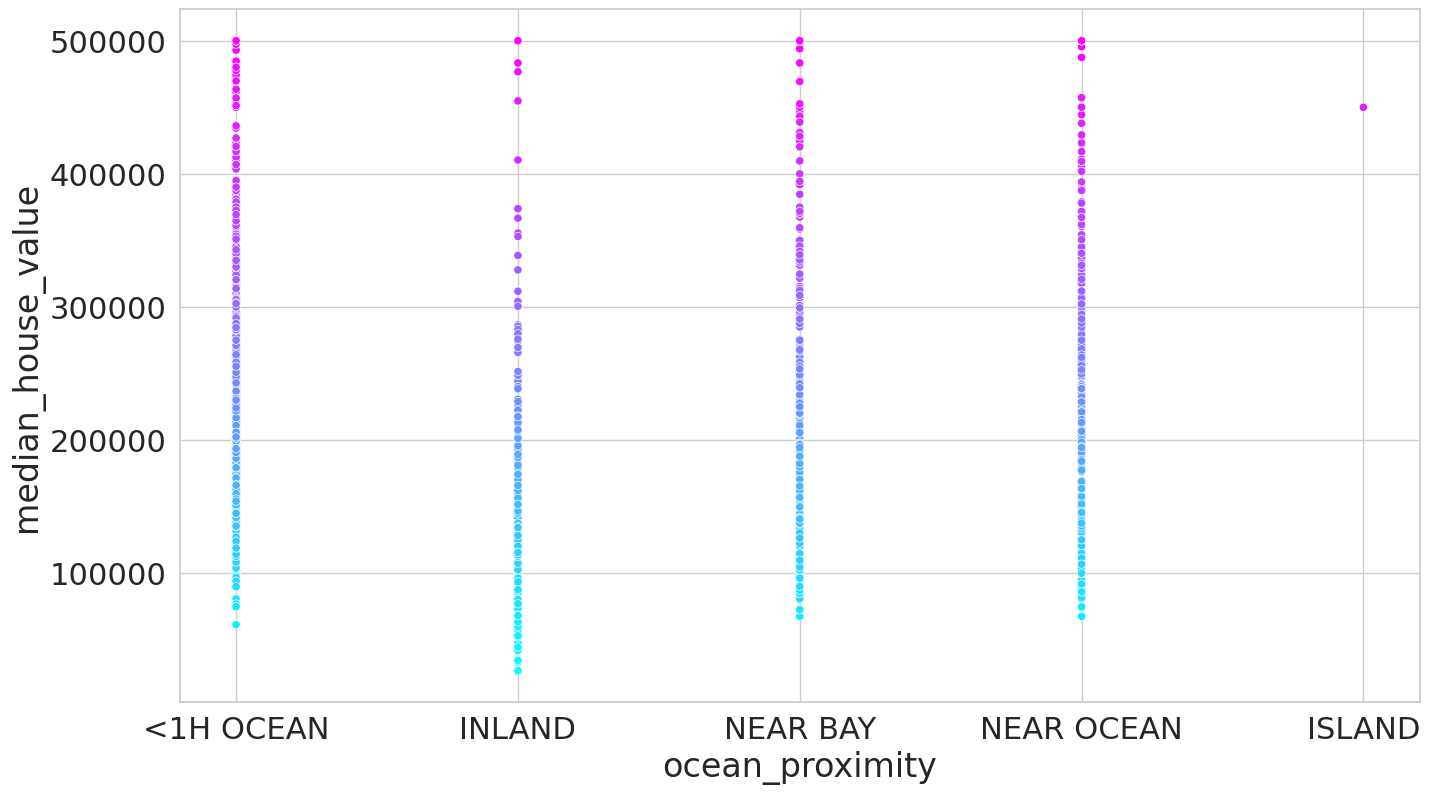

In [146]:
for feature in df.columns:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,y='median_house_value',
                    hue='median_house_value', palette='cool', legend=False)

In [147]:
X = df.iloc[:, :-2].values
y = df.iloc[:,-2].values
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 )
y_train.shape


(16346,)

In [149]:
len(X_test)

4087

# LinearRegression

In [150]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
print("Linear Regression intercept boston: ", lr_model.intercept_)
print("Linear Regression coef boston: ", lr_model.coef_)
y_predict= model.predict(X_test)

Linear Regression intercept boston:  3.862471522084913
Linear Regression coef boston:  [ 0.05972819  0.0214367  -0.27733972  1.96261798 -2.20763963  0.03330055
  0.19586675  1.17045141]


In [151]:
print("MSE (LinearRegression): ", metrics.mean_squared_error(y_test, y_predict))
print("R2_SCORE (LinearRegression): ", metrics.r2_score(y_test, y_predict))
print("MAPE (LinearRegression): ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["median_house_value"].mean()

MSE (LinearRegression):  4621419970.505621
R2_SCORE (LinearRegression):  0.660413735305674
MAPE (LinearRegression):  0.29712319489109923


0.3286260092348296

<AxesSubplot:ylabel='Count'>

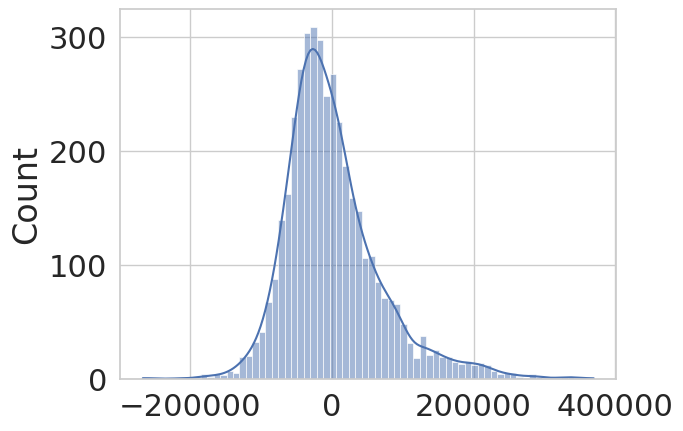

In [152]:
sns.histplot(y_test - y_predict, kde=True)

# Ridge+Polynomial

In [155]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=2, include_bias=False), 
              Ridge(alpha=10))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

print("MSE (Ridge + Polynomial): ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("R2_SCORE (Ridge + Polynomial): ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MAPE (Ridge + Polynomial): ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)) / df["median_house_value"].mean()




MSE (Ridge + Polynomial):  3952900193.450982
R2_SCORE (Ridge + Polynomial):  0.7095371942021029
MAPE (Ridge + Polynomial):  0.2506475977427859


0.3039289985048286

<AxesSubplot:ylabel='Count'>

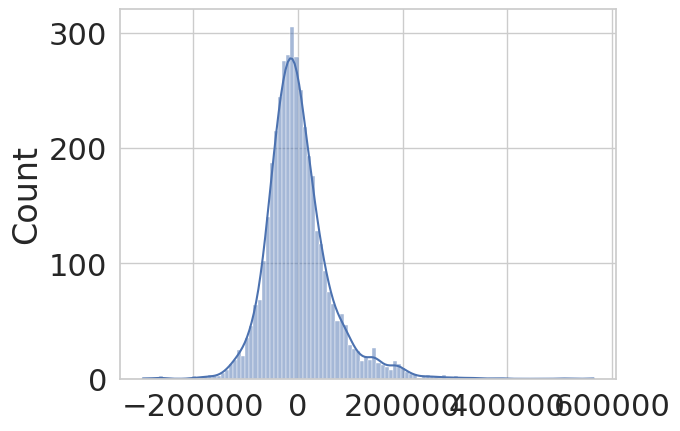

In [156]:
sns.histplot(y_test - y_predict_ridge_poly, kde=True)

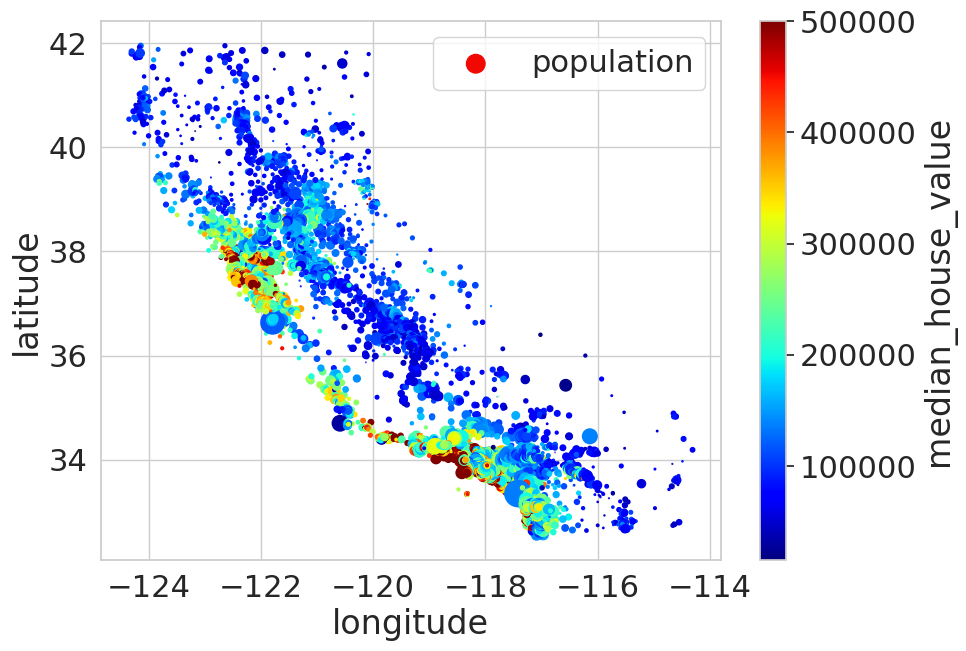

In [134]:
df.plot(kind="scatter", x="longitude", y="latitude",
grid=True,
s=df["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()